In [3]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler

In [4]:
model = models.resnet18(pretrained=True)

In [7]:
num_ftrs = model.fc.in_features

In [8]:
model.fc = nn.Linear(num_ftrs, 136)

### Load parameters from face_detection notes

### when load parameters, make sure models have same structure

In [27]:
model.load_state_dict(torch.load("../pytorchNote/face_detection"))
model = model.to(device)

In [28]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [31]:
import cv2
#my_pict_url = 'test_face/lan.jpg'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def test_face_detection(url):
    img = io.imread(url)

    resized_image = cv2.resize(img, (224, 224)) 
    #print(resized_image.shape)
    resized_image = resized_image.transpose(0,1,2)

    transform1 = transforms.Compose([  
        transforms.ToTensor(), # range [0, 255] -> [0.0,1.0]  
        ]  
    )  


    with torch.no_grad():

        new_img = transform1(resized_image)
        new_img = new_img.view(1,3,224,224)
        new_img = new_img.to(device)
        #print(new_img.size())
        landmarks_batch = model(new_img)
        landmarks_batch = landmarks_batch.view(landmarks_batch.size(0),68,-1)
        landmarks_batch = landmarks_batch.cpu()

        landmarks_batch.numpy()

        batch_size = len(new_img)
        im_size = 224
        
        plt.figure()
        plt.imshow(resized_image)
        

        for i in range(batch_size):
            plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                        landmarks_batch[i, :, 1].numpy(),
                        s=10, marker='^', c='r')

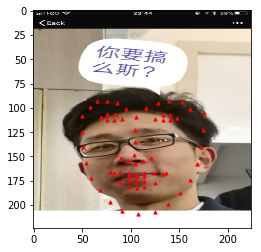

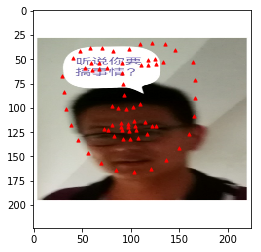

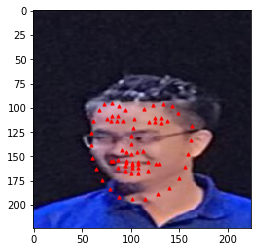

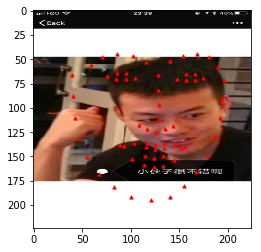

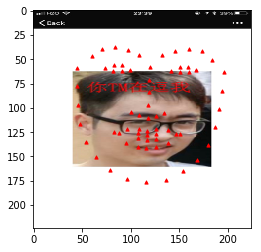

In [32]:
urls = ["lan.jpg","zhe.jpg","shu.jpeg","tan.jpg","yun.jpg"]
for url in urls:
    url = os.path.join("test_face",url)
    test_face_detection(url)